In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('player_data.csv')

In [3]:
df.head()

,Player,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,...,AST,STL,BLK,TOV,PF,Team,Season,Class,Pos,Height
0,Julian Edmonson,30,5.0,568,10.5,26.2,6.2,15.2,4.3,11.0,...,3.0,2.3,0.2,5.6,6.6,abilene-christian,2014,3.0,G,73.0
1,Jacob Lancaster,31,11.0,434,12.0,21.7,11.8,21.5,0.1,0.1,...,1.0,1.0,5.0,5.6,6.7,abilene-christian,2014,3.0,F,82.0
2,Parker Wentz,31,29.0,1040,7.7,15.7,3.2,5.6,4.5,10.1,...,4.9,2.8,0.1,3.4,4.0,abilene-christian,2014,2.0,G,69.0
3,LaDarrien Williams,16,14.0,474,8.1,21.8,6.4,16.3,1.7,5.5,...,7.7,2.4,0.5,4.2,5.2,abilene-christian,2014,3.0,G,72.0
4,Harrison Hawkins,16,16.0,481,6.8,18.1,3.7,10.4,3.1,7.6,...,6.3,2.1,0.0,6.0,5.8,abilene-christian,2014,3.0,G,72.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23868 entries, 0 to 23867
Data columns (total 23 columns):
Player    23868 non-null object
G         23868 non-null int64
GS        23867 non-null float64
MP        23868 non-null int64
FG        23744 non-null float64
FGA       23744 non-null float64
2P        23744 non-null float64
2PA       23744 non-null float64
3P        23744 non-null float64
3PA       23744 non-null float64
FT        23744 non-null float64
FTA       23744 non-null float64
TRB       23744 non-null float64
AST       23744 non-null float64
STL       23744 non-null float64
BLK       23744 non-null float64
TOV       23744 non-null float64
PF        23744 non-null float64
Team      23868 non-null object
Season    23868 non-null int64
Class     23311 non-null float64
Pos       23311 non-null object
Height    23311 non-null float64
dtypes: float64(17), int64(3), object(3)
memory usage: 4.2+ MB


In [5]:
df.describe()

,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,TRB,AST,STL,BLK,TOV,PF,Season,Class,Height
count,23868.000000,23867.000000,23868.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23744.000000,23868.000000,23311.000000,23311.000000
mean,24.359770,12.016592,485.537791,6.331006,15.279127,4.583137,9.684990,1.747545,5.594500,3.611801,5.549212,9.475425,3.296319,1.704443,1.018299,3.668341,6.286965,2015.999623,2.455965,76.819828
std,10.496075,12.947851,369.624537,3.362839,6.736971,3.206025,5.718717,2.063585,5.509197,3.123368,4.614641,5.452278,2.837091,1.856055,1.516546,3.061034,4.307453,1.412924,1.115557,3.518153
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,62.000000
25%,17.000000,0.000000,123.000000,4.400000,11.300000,2.400000,6.000000,0.000000,0.600000,1.800000,3.000000,5.800000,1.400000,0.900000,0.000000,2.500000,4.200000,2015.000000,1.000000,74.000000
50%,29.000000,6.000000,459.000000,6.300000,15.100000,4.300000,9.300000,1.300000,4.900000,3.200000,5.000000,8.700000,2.700000,1.500000,0.500000,3.400000,5.600000,2016.000000,2.000000,77.000000
75%,32.000000,25.000000,805.000000,8.200000,18.800000,6.300000,12.900000,2.900000,8.800000,4.900000,7.400000,12.500000,4.500000,2.200000,1.400000,4.500000,7.700000,2017.000000,3.000000,80.000000
max,41.000000,41.000000,1474.000000,63.400000,126.800000,63.400000,126.800000,56.700000,122.900000,113.600000,125.200000,86.500000,61.100000,64.800000,59.500000,171.300000,245.500000,2018.000000,4.000000,91.000000


In [6]:
# cols = df.columns.tolist()
# cols = [col.lower() for col in cols]
# cols = [col.strip() for col in cols]
# df.columns = cols
# df.columns

**Feature Engineering**
1. Create FG_perc, 2P_perc, 3P_perc, FT_perc and Points Columns

In [7]:
# FG_perc
df['FG_perc'] = df['FG'] / df['FGA']

# 2P_perc
df['2P_perc'] = df['2P'] / df['2PA']

# 3P_perc
df['3P_perc'] = df['3P'] / df['3PA']

# FT_perc
df['FT_perc'] = df['FT'] / df['FTA']

# FT_perc
df['Points'] = df['FT'] +  df['2P'] * 2 + df['3P'] * 3

In [8]:
df[['FG_perc', '2P_perc', '3P_perc', 'FT_perc', 'Points']].head()

,FG_perc,2P_perc,3P_perc,FT_perc,Points
0,0.400763,0.407895,0.390909,0.744000,34.6
1,0.552995,0.548837,1.000000,0.632911,28.9
2,0.490446,0.571429,0.445545,0.865385,24.4
3,0.371560,0.392638,0.309091,0.714286,24.4
4,0.375691,0.355769,0.407895,0.852273,24.2


**Query Questions**
1. How many teams are there?
2. Senior Center with most turn overs before 2017.
3. Team with most points by under classmen.
4. Player under 6 feet tall with most fouls.
5. Guards from each season in top 10% for three-point shot percentage from the 2018 season.

In [9]:
# 1. How many teams are there?
len(df.Team.unique())

351

In [10]:
# 2. Senior Center with most turn overs before 2017.
no2_df = df[(df['Class'] == 4) & (df['Pos'] == 'C') & (df['Season'] < 2017)]
no2_df = no2_df[['Team', 'Player', 'TOV']].groupby('Player').sum().reset_index()
no2_df.sort_values('TOV', ascending=False).iloc[0]

Player    Arthur Gage
TOV              57.5
Name: 16, dtype: object

In [11]:
# 3. Team with most points by under classmen since 2016.
no3_df = df[(df['Class'] < 3) & (df['Season'] >= 2016)]
no3_df = no3_df.groupby('Team').sum()['Points']
no3_df[no3_df == no3_df.max()]

Team
citadel    661.6
Name: Points, dtype: float64

In [12]:
# 4. 5 players under 6 feet tall with most fouls
no4_df = df[df['Height'] < 72].groupby('Player').sum()['PF']
no4_df.sort_values(ascending=False).iloc[:5]

Player
Hank Davis         70.3
Jason Boswell      59.4
Casey Perrin       53.3
Jay Jay Davis      47.7
Kendall Jackson    39.2
Name: PF, dtype: float64

In [16]:
# 5. Guards in top 10% for three-point shot percentage from the 2018 season.
no5_df = df[(df['Season'] == 2018) & (df['Pos'] == 'G')]
no5_df = no5_df[['Team', 'G', 'MP','Player', '3P', '3PA','3P_perc']]
no5_df = no5_df[no5_df['MP'] > 250]
no5_df[no5_df['3P_perc'] >= no5_df['3P_perc'].quantile(.1)].sort_values('3P_perc', ascending=False).reset_index(drop=True)

,Team,G,MP,Player,3P,3PA,3P_perc
0,monmouth,31,405,Marcus McClary,0.3,0.4,0.750000
1,north-carolina-central,23,316,Alston Jones,1.1,1.5,0.733333
2,south-dakota-state,23,300,Chris Howell,0.4,0.6,0.666667
3,winthrop,26,294,Charles Falden,3.2,5.8,0.551724
4,kennesaw-state,30,1102,Nick Masterson,3.7,6.9,0.536232
5,charlotte,9,258,Hudson Price,2.4,4.5,0.533333
6,william-mary,31,945,Connor Burchfield,5.3,10.1,0.524752
7,south-dakota-state,34,501,Lane Severyn,2.4,4.6,0.521739
8,siena,29,328,Christian Bentley,1.3,2.5,0.520000
9,idaho-state,27,889,Jared Stutzman,4.2,8.1,0.518519


**Basic EDA**
1. What columns do we have?
2. How much missing data do I have?
3. Where is this missing data? 

In [17]:
# 1. What columns do we have?
df.columns

Index(['Player', 'G', 'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT',
       'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Team', 'Season',
       'Class', 'Pos', 'Height', 'FG_perc', '2P_perc', '3P_perc', 'FT_perc',
       'Points'],
      dtype='object')

In [19]:
# 2. How much missing data do I have?
null_data = df[df.isnull().any(axis=1)]
len(null_data)

6398

In [20]:
null_data.describe()

,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,...,TOV,PF,Season,Class,Height,FG_perc,2P_perc,3P_perc,FT_perc,Points
count,6398.000000,6397.000000,6398.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,...,6274.000000,6274.000000,6398.000000,5841.000000,5841.000000,5721.000000,5180.000000,1746.000000,3971.000000,6274.000000
mean,15.995936,5.234016,206.731010,5.301020,13.006662,4.501036,9.650207,0.799920,3.356073,2.695473,...,3.835496,7.809531,2015.997812,2.330936,78.227701,0.430578,0.464326,0.245495,0.545332,14.097306
std,11.803097,9.771328,271.207974,4.790788,9.733048,4.462879,8.014881,2.671654,7.484279,4.406510,...,5.335144,7.118793,1.437564,1.113837,3.832744,0.244268,0.251839,0.289292,0.219116,12.002280
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2014.000000,1.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,11.000000,1.900000,7.700000,0.000000,4.500000,0.000000,0.000000,0.000000,...,1.200000,4.400000,2015.000000,1.000000,76.000000,0.301282,0.359532,0.000000,0.455882,6.500000
50%,13.000000,0.000000,56.000000,5.000000,11.700000,4.200000,9.300000,0.000000,0.000000,1.800000,...,3.200000,7.500000,2016.000000,2.000000,79.000000,0.483221,0.500000,0.200000,0.555556,13.200000
75%,28.000000,5.000000,339.750000,7.600000,16.375000,7.000000,13.700000,0.000000,3.300000,4.000000,...,4.700000,10.300000,2017.000000,3.000000,81.000000,0.569343,0.587476,0.381913,0.666667,19.600000
max,40.000000,40.000000,1474.000000,63.400000,126.800000,63.400000,126.800000,56.700000,122.900000,113.600000,...,171.300000,245.500000,2018.000000,4.000000,90.000000,1.000000,1.000000,1.000000,1.000000,170.100000


In [21]:
null_data['G'].mean()

15.995936230071898

In [22]:
# drop NaNs
non_null_data = df.dropna()

In [23]:
non_null_data['G'].mean()

27.42283915283343

**Basic plotting**
1. Create a df for 2018 Season with only MP, FG, 2P, 3P
2. Create histograms for MP, FG, 2P, 3P
3. Create box plots for MP, FG, 2P, 3P
4. Scatter FG, 2P and 3P by MP.
5. Make a scatter matrix.

In [28]:
df_2018_wn = df[(df['Season'] == 2018)]
df_2018 = df[(df['Season'] == 2018) & (df['MP'] > 250)].dropna()

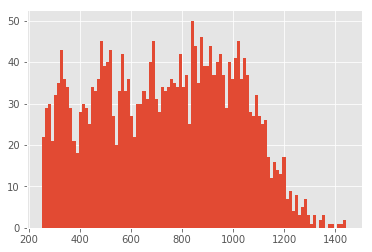

In [29]:
df_2018.MP.hist(bins=100);

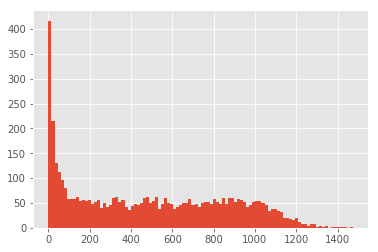

In [34]:
df_2018_wn['MP'].hist(bins=100);

In [31]:
df_2018['FG'].describe()

count    2657.000000
mean        7.196839
std         2.306900
min         0.900000
25%         5.500000
50%         7.000000
75%         8.700000
max        15.800000
Name: FG, dtype: float64

In [32]:
df_2018_wn['FG'].describe()

count    4731.000000
mean        6.451807
std         3.387102
min         0.000000
25%         4.500000
50%         6.400000
75%         8.400000
max        57.800000
Name: FG, dtype: float64

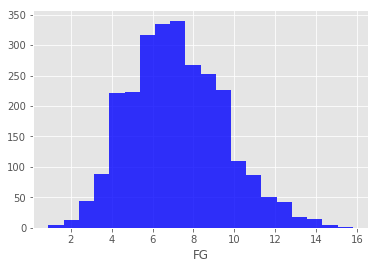

In [36]:
# Create figure canvas and axis 
fig = plt.figure()
ax = fig.add_subplot(111)

#set labels
ax.set_xlabel('FG')

ax.hist(df_2018['FG'], bins=20, color='blue',alpha=0.8);

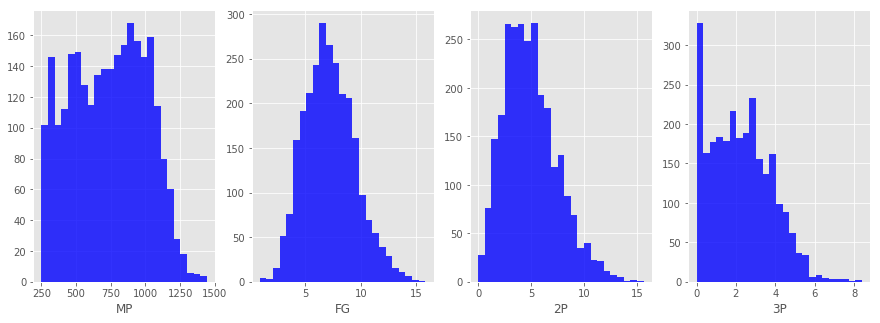

In [45]:
feats = ['MP', 'FG', '2P', '3P']

fig = plt.figure(figsize=(15, 5))
plot = 1

for feat in feats:
    ax = fig.add_subplot(1, len(feats), plot)
    #set labels
    ax.set_xlabel(feat)
    ax.hist(df_2018[feat],bins=25,color='blue',alpha=0.8)
    plot += 1

ValueError: max must be larger than min in range parameter.

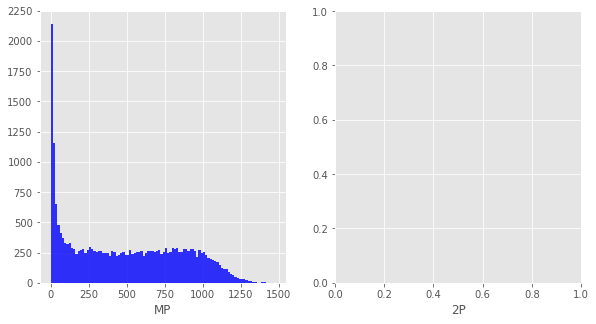

In [49]:
# Create figure canvas and axis 

feats = ['MP', '2P', '3P']

fig = plt.figure(figsize=(15, 5))
plot = 1

for feat in feats:
    ax = fig.add_subplot(1, len(feats), plot)
    #set labels
    ax.set_xlabel(feat)
    ax.hist(df[feat],bins=100,color='blue',alpha=0.8)
    plot += 1

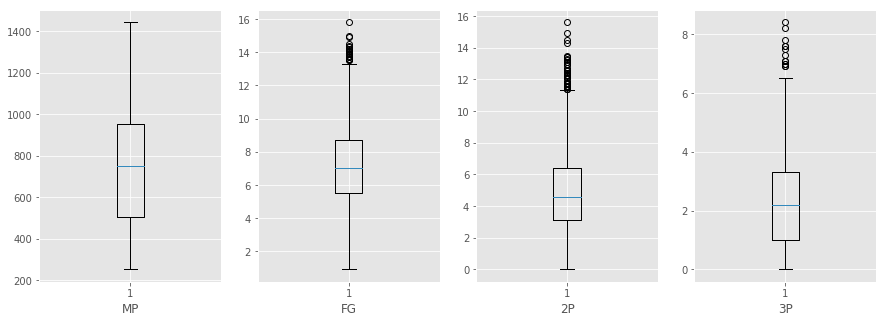

In [43]:
# Create figure canvas and axis 

feats = ['MP', 'FG', '2P', '3P']

fig = plt.figure(figsize=(15, 5))
plot = 1

for feat in feats:
    ax = fig.add_subplot(1, len(feats), plot)
    ax.set_xlabel(feat)
    ax.boxplot(df_2018[feat])
    plot += 1

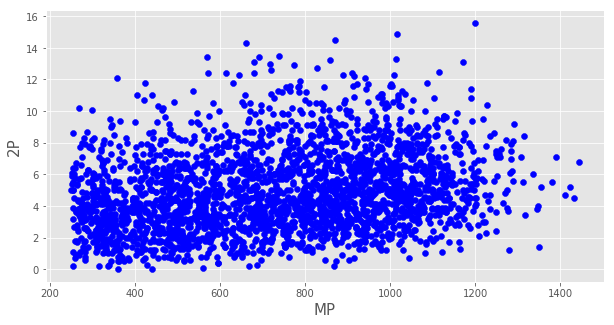

In [53]:
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x=df_2018['MP'], y=df_2018['2P'], color='blue')
ax.set_xlabel('MP', size=15)
ax.set_ylabel('2P', size=15);

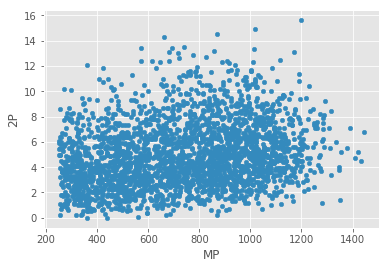

In [54]:
df_2018.plot.scatter(x='MP', y='2P');

In [58]:
points_df = df_2018[['MP', '2P', '3P', 'FT']].reset_index(drop=True)

In [59]:
points_df.head()

,MP,2P,3P,FT
0,714,9.0,3.6,4.6
1,998,8.2,0.7,5.1
2,1037,4.1,2.5,5.7
3,326,7.9,0.7,3.1
4,300,4.8,3.0,1.9


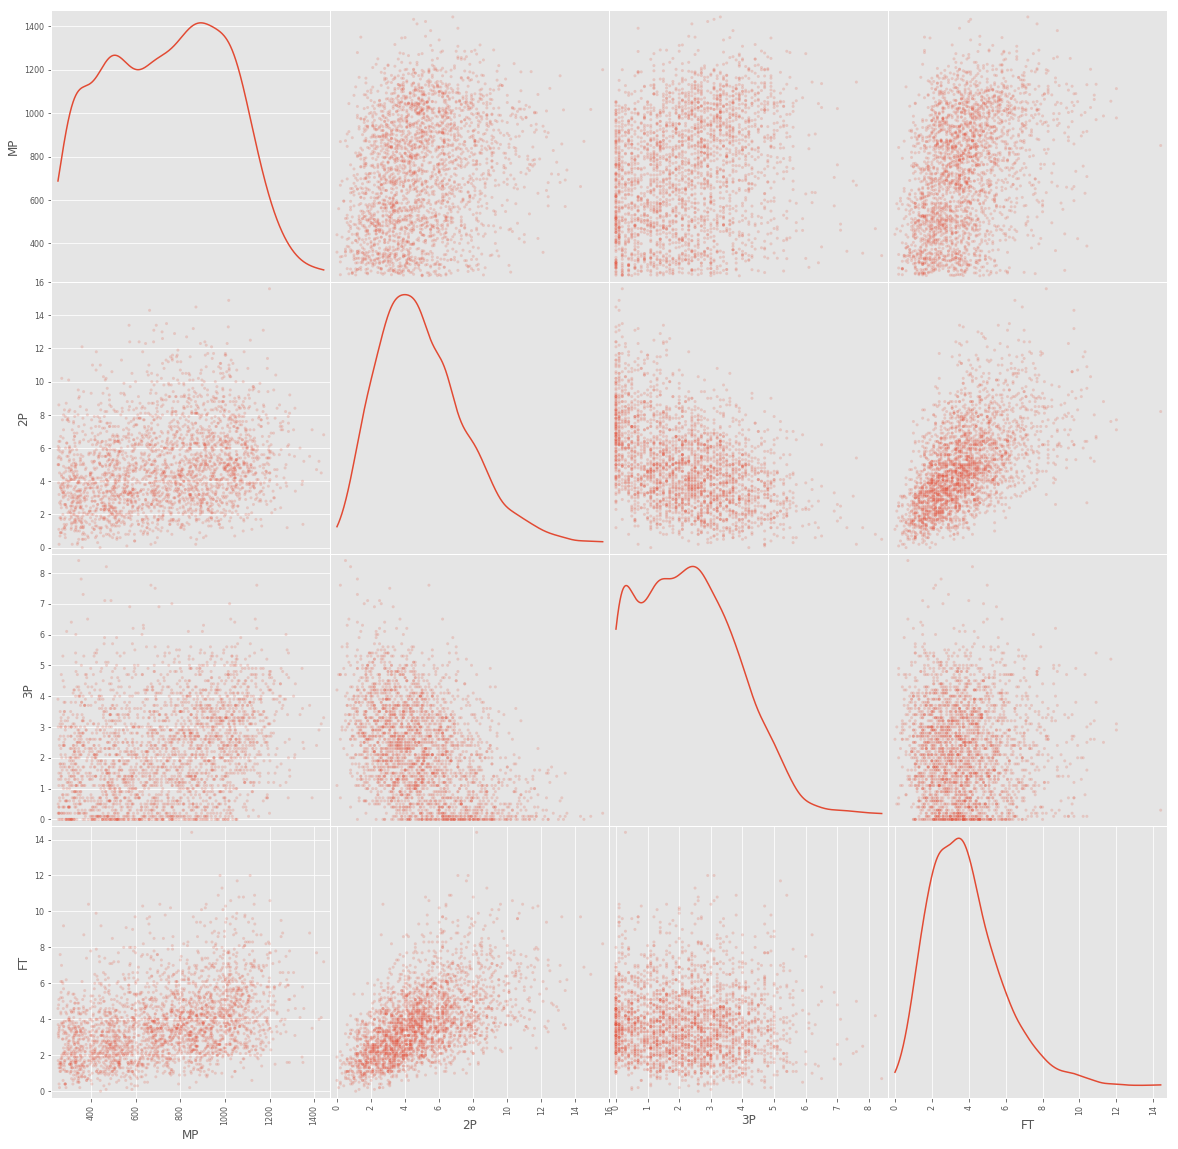

In [60]:
scatter_matrix(points_df, alpha=0.2, figsize=(20, 20), diagonal='kde');